In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [3]:
df=pd.read_csv('Downloads/CarPrice_Assignment.csv')

In [5]:
df.shape

(205, 26)

In [6]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [8]:
df.isnull().sum()


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


###length of unique values

In [11]:
for column in df.columns:
    unique_count = df[column].nunique()
    print(f"Column '{column}' has {unique_count} unique values.")

Column 'car_ID' has 205 unique values.
Column 'symboling' has 6 unique values.
Column 'CarName' has 147 unique values.
Column 'fueltype' has 2 unique values.
Column 'aspiration' has 2 unique values.
Column 'doornumber' has 2 unique values.
Column 'carbody' has 5 unique values.
Column 'drivewheel' has 3 unique values.
Column 'enginelocation' has 2 unique values.
Column 'wheelbase' has 53 unique values.
Column 'carlength' has 75 unique values.
Column 'carwidth' has 44 unique values.
Column 'carheight' has 49 unique values.
Column 'curbweight' has 171 unique values.
Column 'enginetype' has 7 unique values.
Column 'cylindernumber' has 7 unique values.
Column 'enginesize' has 44 unique values.
Column 'fuelsystem' has 8 unique values.
Column 'boreratio' has 38 unique values.
Column 'stroke' has 37 unique values.
Column 'compressionratio' has 32 unique values.
Column 'horsepower' has 59 unique values.
Column 'peakrpm' has 23 unique values.
Column 'citympg' has 29 unique values.
Column 'highwa

## data preprocessing

In [12]:
len(df['car_ID'])

205

In [13]:
#drop car-id column
df.drop(['car_ID'], axis=1, inplace=True)

In [ ]:
df

In [14]:
df['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [290]:
print(len(df['CarName'].unique()))
df['CarName'].unique()

147


array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [19]:
#sepaarte column  for a car company
df['Company']=df.CarName.str.split(expand=True)[0]
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,5,alfa-romero giulia,1,0,1,0,2,0,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,5,alfa-romero stelvio,1,0,1,0,2,0,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,alfa-romero Quadrifoglio,1,0,1,2,2,0,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,audi 100 ls,1,0,0,3,1,0,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,4,audi 100ls,1,0,0,3,0,0,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [20]:
del df['CarName']

In [21]:
df['Company']



0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: Company, Length: 205, dtype: object

In [ ]:
df.columns

In [16]:
#label encoding
label_encoder=preprocessing.LabelEncoder()

In [22]:
df[ 'symboling']=label_encoder.fit_transform(df[ 'symboling'])
df['fueltype']=label_encoder.fit_transform(df['fueltype'])
df['aspiration']=label_encoder.fit_transform(df['aspiration'])
df['doornumber']=label_encoder.fit_transform(df['doornumber'])
df['carbody']=label_encoder.fit_transform(df['carbody'])
df['drivewheel']=label_encoder.fit_transform(df['drivewheel'])
df['enginelocation']=label_encoder.fit_transform(df['enginelocation'])
df[ 'Company']=label_encoder.fit_transform(df[ 'Company'])

In [296]:
print(len(df.columns))
df.columns


25


Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'Company'],
      dtype='object')

#### feature selection

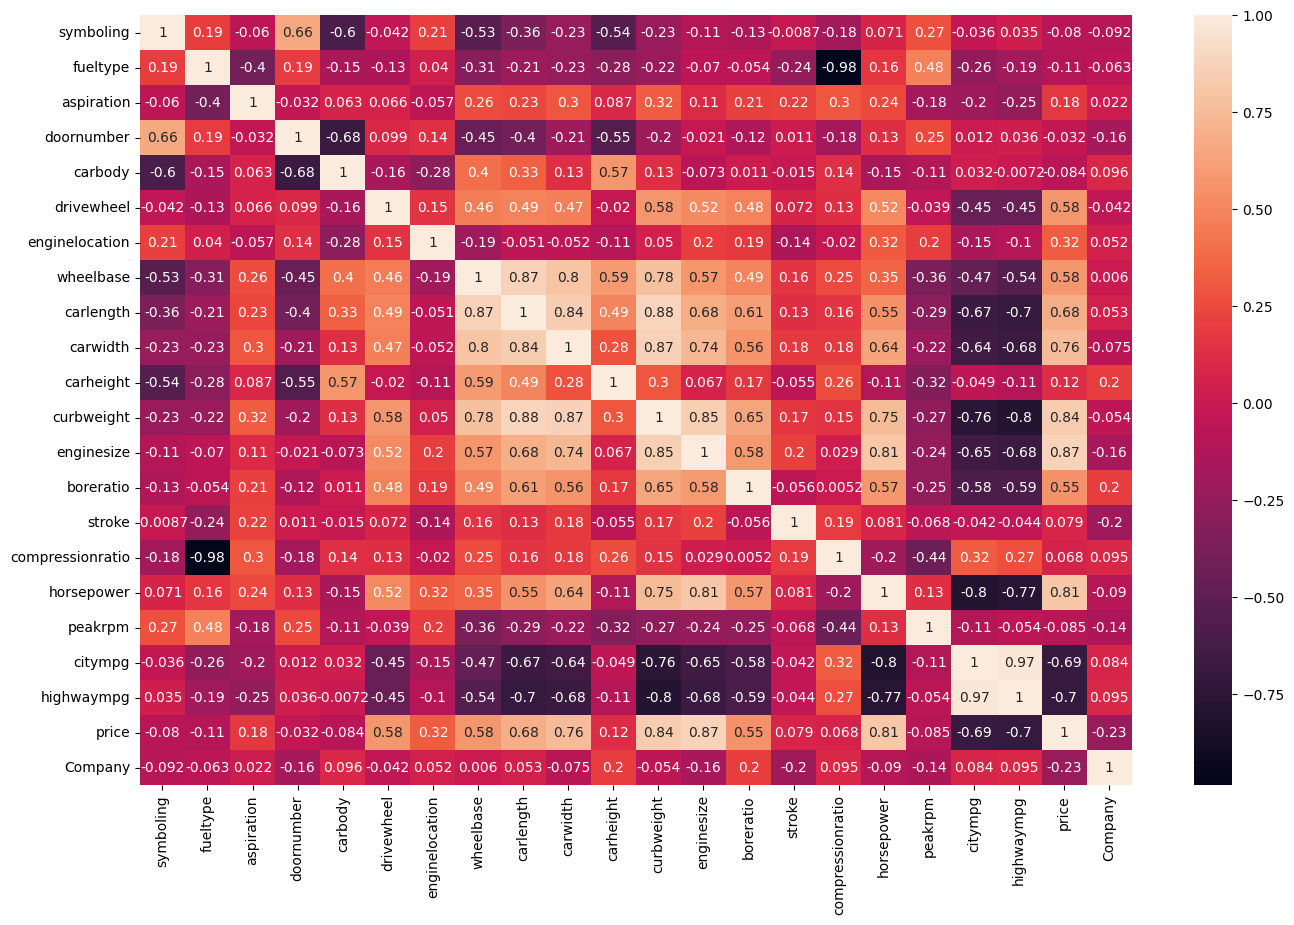

In [298]:


# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Correlation
plt.figure(figsize=(16, 10))
ax = sns.heatmap(numeric_df.corr(), annot=True)
plt.show()


### EDA

C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


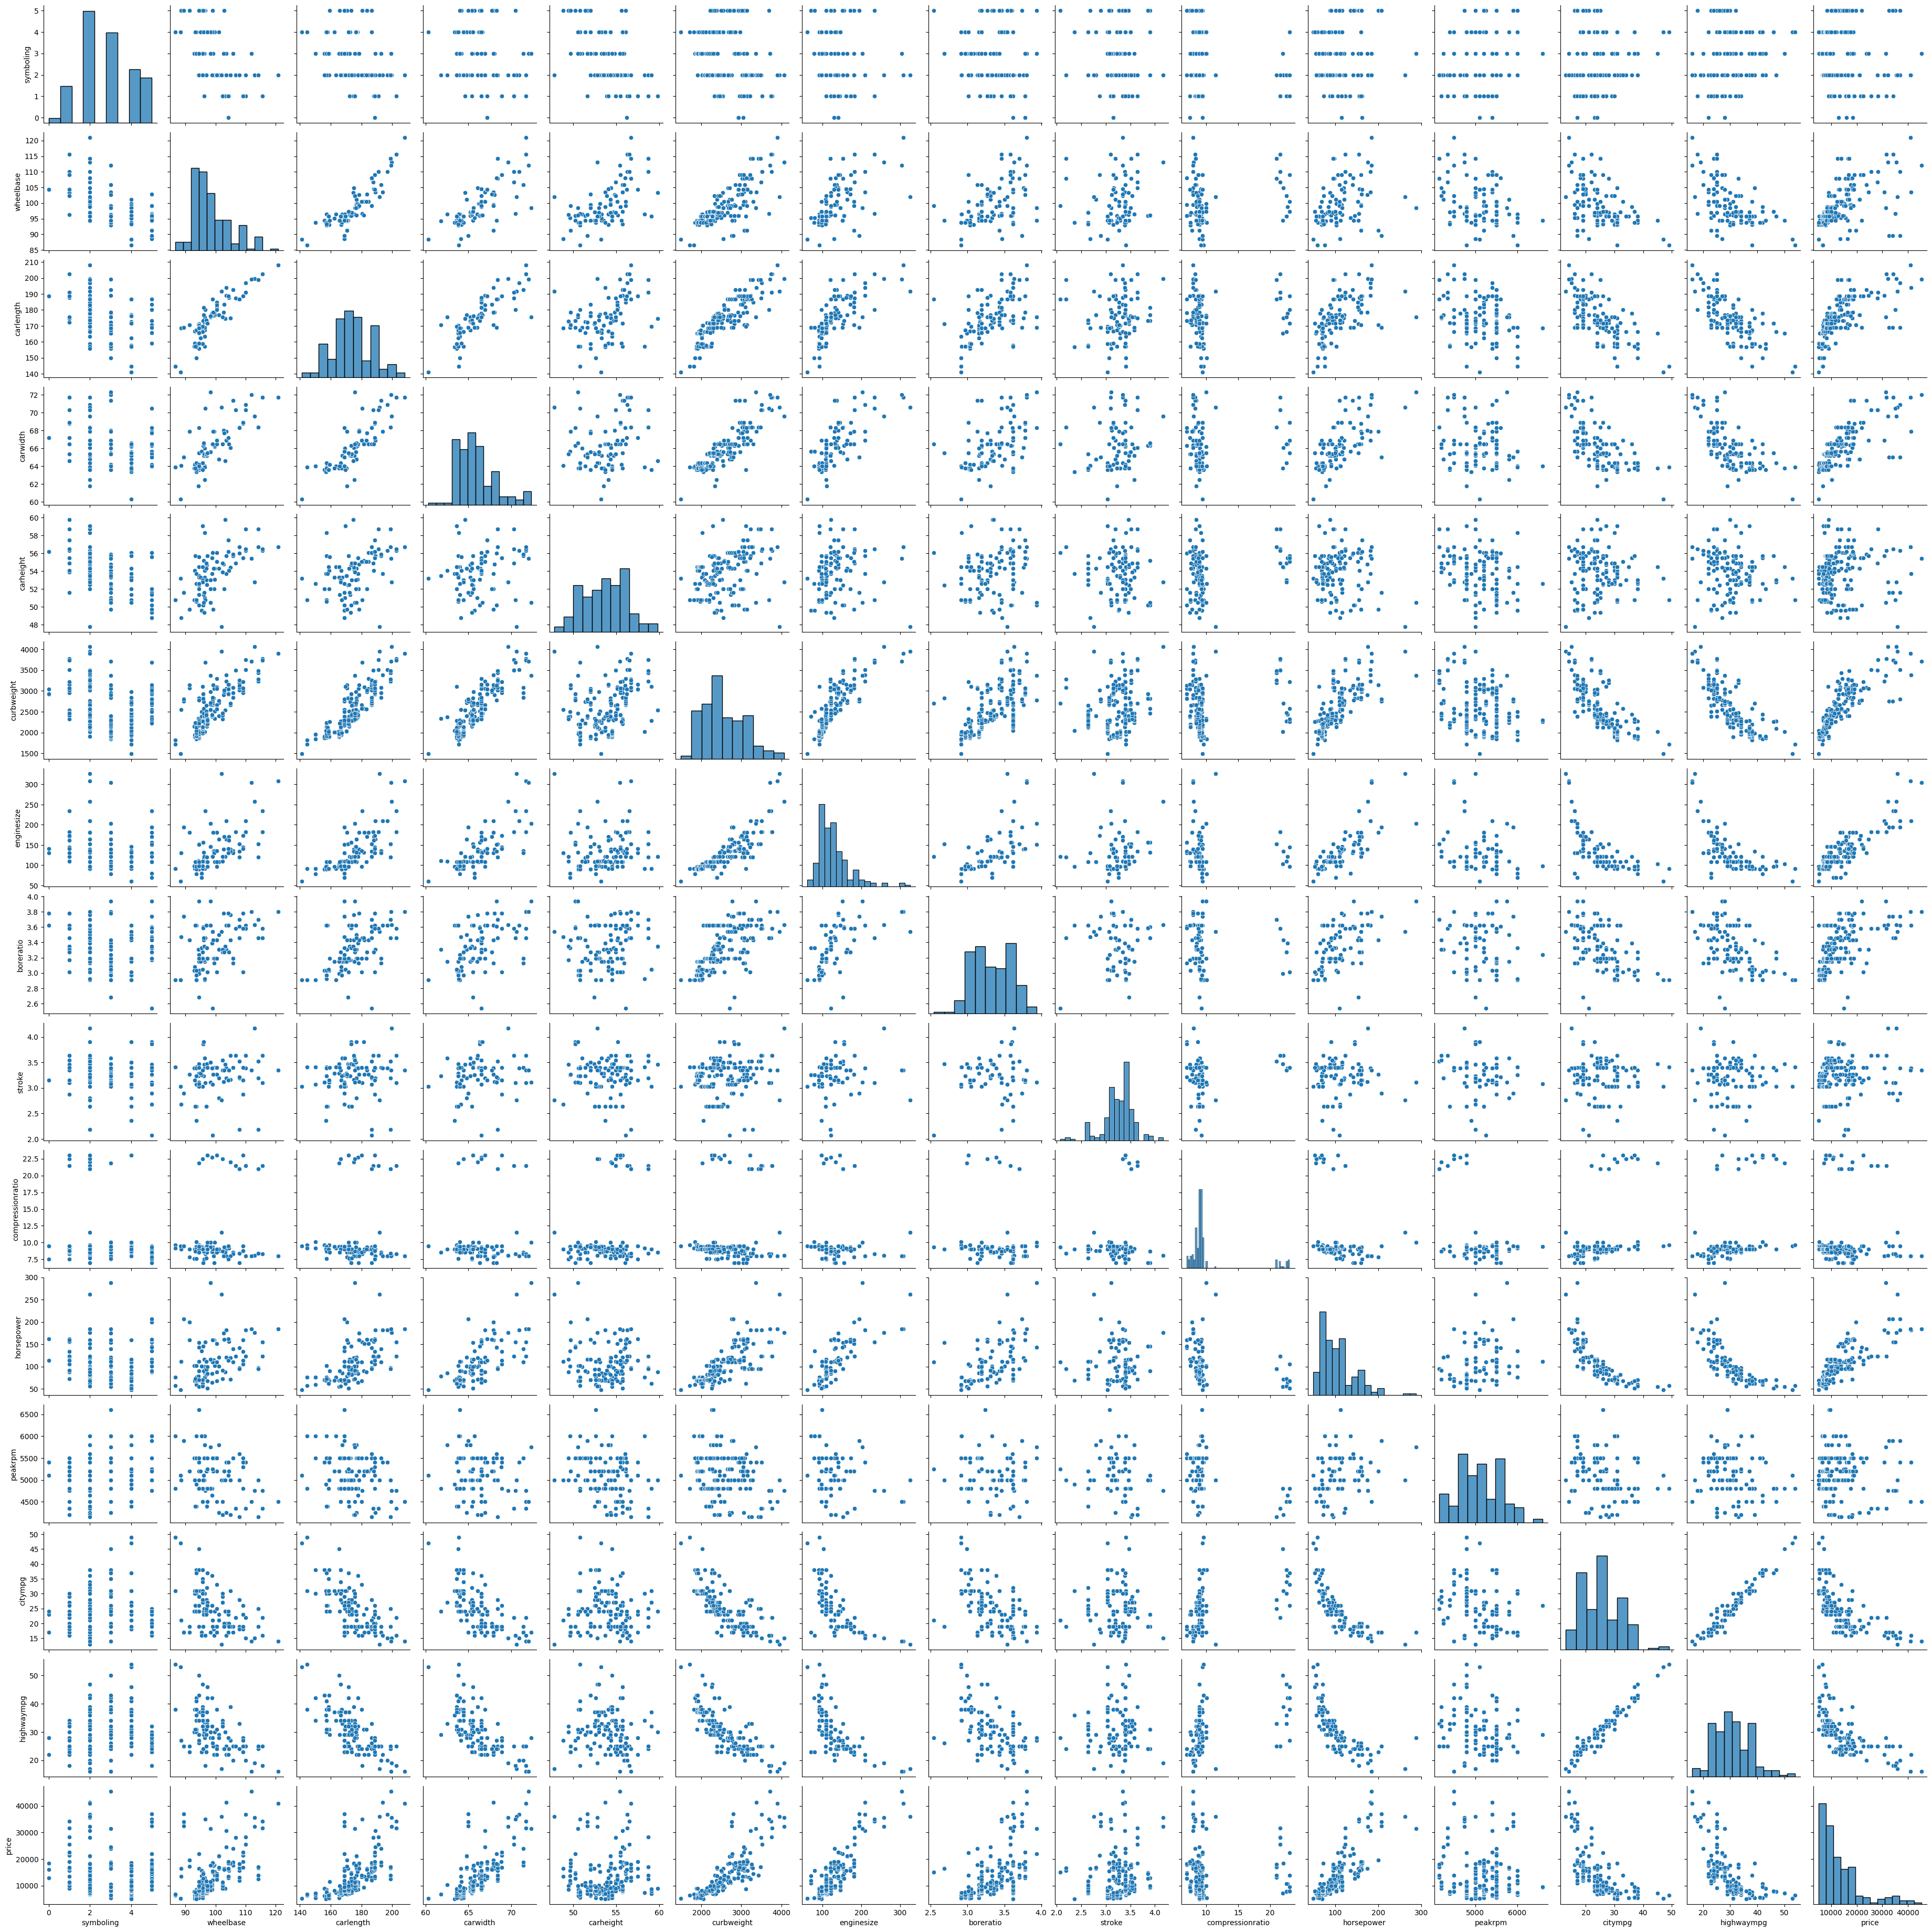

In [32]:
selected_columns = [
    'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
    'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
    'peakrpm', 'citympg', 'highwaympg', 'price'
]


selected_data = df[selected_columns]

# Create a pair plot
sns.pairplot(selected_data)
plt.show()


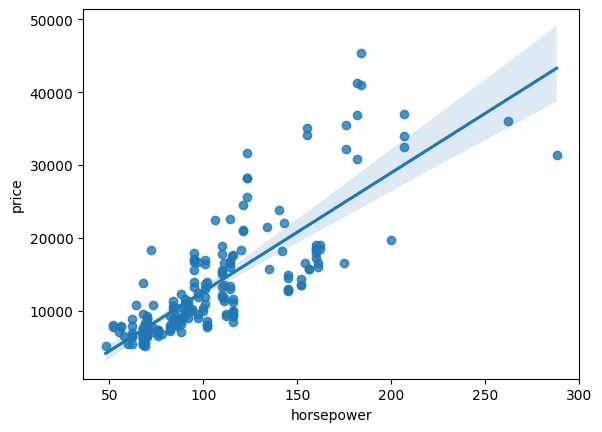

In [23]:

sns.regplot(x='horsepower', y='price', data=df)
plt.show()


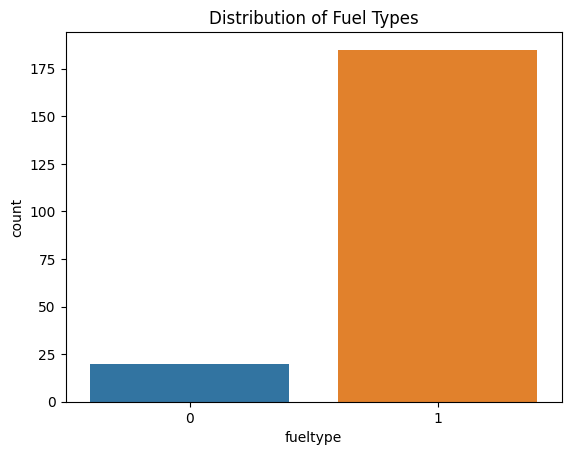

In [26]:

sns.countplot(data=df, x='fueltype')
plt.title('Distribution of Fuel Types')
plt.show()


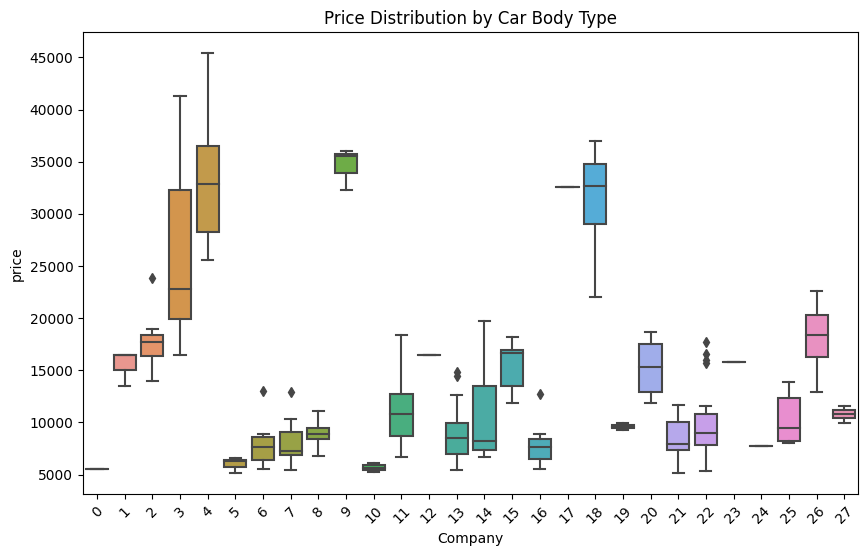

In [25]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Company', y='price')
plt.xticks(rotation=45)
plt.title('Price Distribution by Car Body Type')
plt.show()


In [36]:
x=df[['symboling','fueltype', 'doornumber','carbody','carheight', 'stroke','compressionratio', 'horsepower', 'peakrpm','Company']]
y=df[['price']]
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,5,1,0,1,0,2,0,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,1
1,5,1,0,1,0,2,0,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1
2,3,1,0,1,2,2,0,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,1
3,4,1,0,0,3,1,0,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,2
4,4,1,0,0,3,0,0,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,2


In [ ]:
# spliting

In [40]:
from sklearn.model_selection import train_test_split



# Split the data into training and testing sets (e.g., 80% train and 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [41]:
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

x_train: (164, 10)
y_train: (164, 1)
x_test: (41, 10)
y_test: (41, 1)


In [42]:
#MODEL SELECTION
reg= LinearRegression()

In [43]:
reg.fit(x_train,y_train)

LinearRegression()

In [44]:

# Evaluate the model on the testing data
score = reg.score(x_test, y_test)

# Print the R-squared score
print("R-squared score:", score)


R-squared score: 0.7722743586837726


In [45]:
predict=reg.predict(x_test)
predict

array([[31220.39225671],
       [17874.59545376],
       [ 8656.69663135],
       [ 8201.48229796],
       [ 9547.73557266],
       [15265.58177386],
       [ 5626.38732401],
       [11092.87327326],
       [ 6205.78035014],
       [18559.5053826 ],
       [12442.9299124 ],
       [11471.70662657],
       [13405.38462169],
       [ 7396.56197245],
       [ 6367.22076033],
       [ 9138.87458379],
       [20468.58103748],
       [15172.25302752],
       [15260.18431398],
       [14251.40608839],
       [13073.60362472],
       [12748.11475618],
       [12407.51349917],
       [12748.11475618],
       [ 8648.45677368],
       [12442.9299124 ],
       [10739.8035219 ],
       [13233.38596172],
       [19729.41296675],
       [11471.70662657],
       [13176.99151224],
       [ 4419.05178342],
       [ 9256.72067607],
       [16200.97968096],
       [29027.37999002],
       [20038.78875445],
       [11970.82488425],
       [ 7862.41435094],
       [ 7387.9637627 ],
       [ 6579.42766886],


In [60]:
test_data_df = x_test.copy()
test_data_df['Predicted_price'] = predict
test_data_df.head()


,symboling,fueltype,doornumber,carbody,carheight,stroke,compressionratio,horsepower,peakrpm,Company,Predicted_price
74,3,1,1,1,55.4,3.35,8.0,184,4500,4,31220.392257
29,5,1,1,2,50.2,3.90,7.0,145,5000,6,17874.595454
147,2,1,0,4,53.0,2.64,9.0,94,5200,21,8656.696631
140,4,1,1,2,55.7,2.64,8.7,73,4400,21,8201.482298
27,3,1,1,3,50.6,3.39,7.6,102,5500,6,9547.735573


In [63]:

actual_prices = df['price']


predicted_price = test_data_df['Predicted_price'] = predict


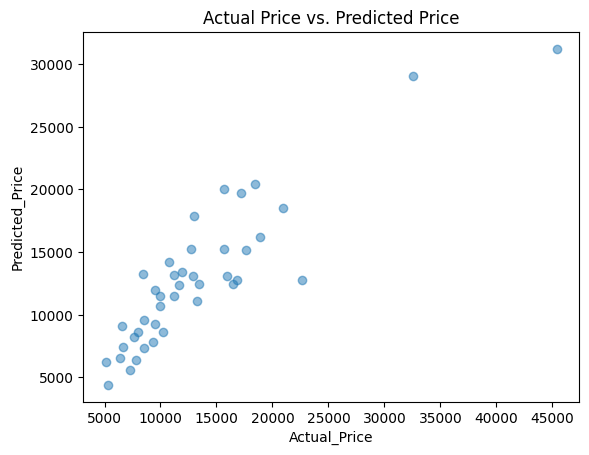

In [67]:
# Scatter plot to visualize actual vs. predicted prices
plt.scatter(y_test, predicted_price, alpha=0.5)
plt.xlabel('Actual_Price')
plt.ylabel('Predicted_Price')
plt.title('Actual Price vs. Predicted Price')
plt.show()


In [51]:
mse = mean_squared_error(y_test, predict)
mse


12427507.029209288

In [53]:
reg.intercept_

array([-21927.64328953])